PART 2:

Q1:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [ ]:
#https://drive.google.com/file/d/116ho57xYxPgjTET5qOR30VLfwoxFAaI4/view?usp=sharing

!pip install --upgrade --no-cache-dir gdown
!gdown 116ho57xYxPgjTET5qOR30VLfwoxFAaI4

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=116ho57xYxPgjTET5qOR30VLfwoxFAaI4
To: /content/data_banknote_authentication.txt
100% 46.4k/46.4k [00:00<00:00, 86.5MB/s]


In [ ]:
df = pd.read_csv('/content/data_banknote_authentication.txt', delimiter=',')
df.to_csv('/content/data_banknote_authentication.csv', index=False)

Q2:

In [ ]:
shuffled_df = df.sample(frac=1, random_state=13).reset_index(drop=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = shuffled_df[['Variance', 'Skewness', 'kurtosis', 'Entropy']].values
y = shuffled_df[['Class ']].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape,

((1097, 4), (275, 4), (1097, 1), (275, 1))

Q3:

Logistic Regression Model

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
def logistic_regression(x, w):
    y_hat = sigmoid(x @ w)
    return y_hat

Binary Cross Entropy(BCE)

In [ ]:
def bce(y, y_hat):
    loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
    return loss

Gradient

In [ ]:
def gradient(x, y, y_hat):
    grads = (x.T @ (y_hat - y)) / len(y)
    return grads

Gradient Descent

In [ ]:
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

Accuracy

In [ ]:
def accuracy(y, y_hat):
    acc = np.sum(y == np.round(y_hat)) / len(y)
    return acc

Train

In [ ]:
x_train = np.hstack((np.ones((len(x_train), 1)), x_train))
x_train.shape

(1097, 5)

In [ ]:
m = 4
w = np.random.randn(m+1, 1)
print(w.shape)

eta = 0.01
n_epochs = 2000

(5, 1)


Error History

In [ ]:
error_hist = []

for epoch in range(n_epochs):
    # predictions
    y_hat = logistic_regression(x_train, w)

    # loss
    e = bce(y_train, y_hat)
    error_hist.append(e)

    # gradients
    grads = gradient(x_train, y_train, y_hat)

    # gradient decsent
    w = gradient_descent(w, eta, grads)

    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t E={e:,.4},\t w+{w.T[0]}')

Epoch=99, 	 E=0.7204,	 w+[-1.18287792 -0.00875558 -0.05345139  0.15424336 -0.09952306]
Epoch=199, 	 E=0.4101,	 w+[-1.02802797 -0.44194073 -0.17532291 -0.02765969 -0.26043686]
Epoch=299, 	 E=0.3169,	 w+[-0.887006   -0.64764281 -0.27260819 -0.1504256  -0.32786489]
Epoch=399, 	 E=0.2668,	 w+[-0.76057416 -0.78259553 -0.34614177 -0.24257835 -0.36690001]
Epoch=499, 	 E=0.234,	 w+[-0.64610335 -0.88246192 -0.40492406 -0.31662815 -0.39143318]
Epoch=599, 	 E=0.2103,	 w+[-0.54132352 -0.96123654 -0.45377676 -0.37873795 -0.40726597]
Epoch=699, 	 E=0.1919,	 w+[-0.44453415 -1.02594597 -0.49550075 -0.43231762 -0.41745131]
Epoch=799, 	 E=0.1772,	 w+[-0.35447168 -1.08063697 -0.53186337 -0.47945823 -0.42378154]
Epoch=899, 	 E=0.165,	 w+[-0.27017872 -1.12785684 -0.5640511  -0.52154508 -0.42738385]
Epoch=999, 	 E=0.1547,	 w+[-0.1909117  -1.16931322 -0.59289865 -0.55954989 -0.42900356]
Epoch=1099, 	 E=0.1459,	 w+[-0.11607927 -1.20620627 -0.61901499 -0.59418418 -0.42915311]
Epoch=1199, 	 E=0.1381,	 w+[-0.045

Plot Error

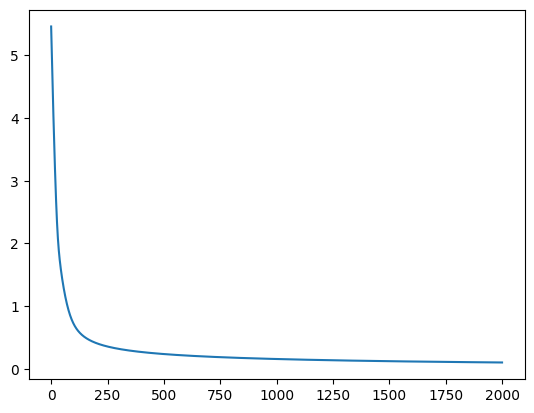

In [ ]:
plt.plot(error_hist)

Test

In [ ]:
x_test = np.hstack((np.ones((len(x_test), 1)), x_test))
x_test.shape

(275, 5)

In [ ]:
y_hat = logistic_regression(x_test, w)
accuracy(y_test, y_hat)

0.9781818181818182

Q4 & Q5:

In [ ]:
from sklearn.preprocessing import StandardScaler
data2 = pd.read_csv('/content/data_banknote_authentication.csv')

scaler = StandardScaler()

scaled_data2 = scaler.fit_transform(data2)

scaled_df2 = pd.DataFrame(scaled_data2, columns=data2.columns)

shuffled_scaled_df2 = scaled_df2.sample(frac=1, random_state=13).reset_index(drop=True)

X2 = shuffled_scaled_df2[['Variance', 'Skewness', 'kurtosis', 'Entropy']].values
y2 = shuffled_scaled_df2[['Class ']].values

x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)

x_train2 = np.hstack((np.ones((len(x_train2), 1)), x_train2))

m_new = 4
w_new = np.random.randn(m_new+1, 1)
print(w_new.shape)

eta_new = 0.01
n_epochs_new = 2000


(5, 1)


In [ ]:
error_hist_new = []

for epoch_new in range(n_epochs_new):
    # predictions
    y_hat2 = logistic_regression(x_train2, w_new)

    # loss
    e_new = bce(y_train2, y_hat2)
    error_hist_new.append(e_new)

    # gradients
    grads_new = gradient(x_train2, y_train2, y_hat2)

    # gradient decsent
    w_new = gradient_descent(w_new, eta_new, grads_new)

    if (epoch_new+1) % 100 == 0:
        print(f'Epoch={epoch_new}, \t E={e_new:,.4},\t w={w_new.T[0]}')

Epoch=99, 	 E=-0.4226,	 w=[-0.57314736 -1.38318773 -0.86605683 -0.16548273 -1.60286629]
Epoch=199, 	 E=-0.9304,	 w=[-0.95083483 -1.80615511 -1.24665062 -0.10250569 -1.41498312]
Epoch=299, 	 E=-1.346,	 w=[-1.30422139 -2.20766675 -1.57616681 -0.08124328 -1.27425782]
Epoch=399, 	 E=-1.715,	 w=[-1.64023226 -2.6015198  -1.8751113  -0.08355913 -1.169603  ]
Epoch=499, 	 E=-2.056,	 w=[-1.96308821 -2.99224974 -2.15379192 -0.10072693 -1.09334163]
Epoch=599, 	 E=-2.38,	 w=[-2.27633051 -3.38130202 -2.41890778 -0.12741488 -1.03827896]
Epoch=699, 	 E=-2.692,	 w=[-2.58274542 -3.76909229 -2.67502748 -0.1601969  -0.9984198 ]
Epoch=799, 	 E=-2.998,	 w=[-2.88433267 -4.15574404 -2.92518566 -0.19690395 -0.96933124]
Epoch=899, 	 E=-3.298,	 w=[-3.18246848 -4.54132431 -3.17136285 -0.23617592 -0.94791317]
Epoch=999, 	 E=-3.594,	 w=[-3.47809278 -4.92590337 -3.41485039 -0.27715694 -0.93203071]
Epoch=1099, 	 E=-3.888,	 w=[-3.77185332 -5.30956178 -3.65649744 -0.3193021  -0.92020809]
Epoch=1199, 	 E=-4.18,	 w=[-4.0

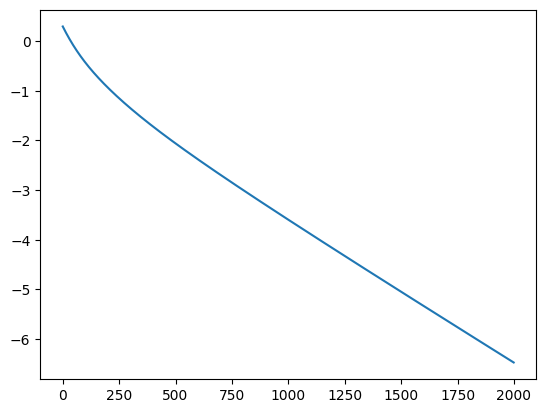

In [ ]:
plt.plot(error_hist_new)

In [ ]:
x_test2 = np.hstack((np.ones((len(x_test2), 1)), x_test2))

y_hat2 = logistic_regression(x_test2, w_new)
accuracy(y_test2, y_hat2)

0.0

In [ ]:
for i in range(5):
    print(f"data {i+1}: y_hat2 = {y_hat2[i]}, y2= {y2[i]}")

data 1: y_hat2 = [0.00987633], y2= [-0.89472059]
data 2: y_hat2 = [0.90525878], y2= [1.11766736]
data 3: y_hat2 = [1.], y2= [-0.89472059]
data 4: y_hat2 = [0.2883632], y2= [-0.89472059]
data 5: y_hat2 = [3.0865357e-05], y2= [-0.89472059]


Q6:

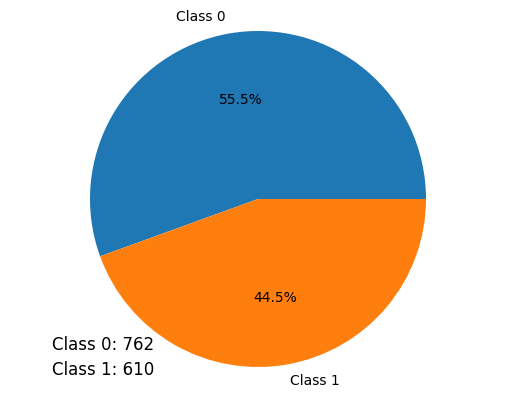

In [ ]:
# محاسبه تعداد نمونه‌های هر کلاس
y_counts = df[['Class ']].value_counts()
# نمایش نمودار دایره‌ای
labels = ['Class 0', 'Class 1']
plt.pie(y_counts, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # این دستور برای اینه که دایره ما کامل باشد!

# افزودن تعداد داده‌های هر کلاس به صورت مستقیم بر روی نمودار
for i, count in enumerate(y_counts):
    plt.text(x=-0.92, y=-0.9 - i * 0.15, s=f'{labels[i]}: {count}', ha='center', fontsize=12)

plt.show()

In [ ]:
! pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


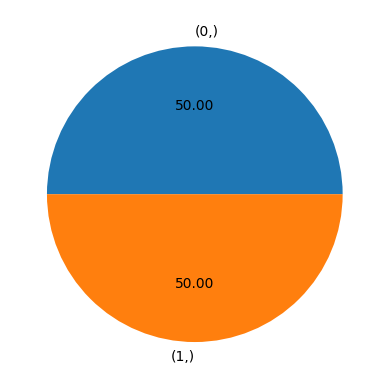

In [ ]:
# undersampling :
from imblearn.under_sampling import RandomUnderSampler

y = pd.DataFrame(y, columns=[''])
rus = RandomUnderSampler(sampling_strategy=1)
x_res_undersampling , y_res_undersampling = rus.fit_resample(X , y)
ax = y_res_undersampling.value_counts().plot.pie(autopct = '%.2f')


Q7:

In [ ]:
from sklearn.linear_model import LogisticRegression

X3 = shuffled_df[['Variance', 'Skewness', 'kurtosis', 'Entropy']].values
y3 = shuffled_df[['Class ']].values

x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, y3, random_state=13, stratify=y3, test_size=0.2)

model = LogisticRegression(solver='sag', max_iter=210)
model.fit(x_train3, y_train3)
model.predict(x_test3)

print("Accuracy of test data: %", model.score(x_test3, y_test3)*100)
print("Accuracy of train data: %", model.score(x_train3, y_train3)*100)

Accuracy of test data: % 99.27272727272727
Accuracy of train data: % 98.99726526891523


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
